<a href="https://colab.research.google.com/github/Jyoshitha04/CODTECH-TASK-3/blob/main/PREDICTIVE_MODELING_WITH_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [81]:
# Load the dataset
df = pd.read_csv('/content/laptopPrice.csv')

# Display the first few rows
print(df.head())

    brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windows  64-bit            0 GB  Casual  No warranty   

  Touchscreen msoffice  Price   rating  Number of Ratings  Number of Reviews  
0      

# Data Cleaning and Preprocessing
We will:

Convert columns like ram_gb, ssd, and hdd to numeric values.

Handle missing values.

Encode categorical columns for machine learning models.

Generate new features where appropriate (e.g., has_ssd).

In [82]:
# Convert 'ram_gb', 'ssd', and 'hdd' columns to strings first, then remove 'GB' and convert to numeric
df['ram_gb'] = pd.to_numeric(df['ram_gb'].astype(str).str.replace(" GB", ""), errors='coerce')
df['ssd'] = pd.to_numeric(df['ssd'].astype(str).str.replace(" GB", ""), errors='coerce')
df['hdd'] = pd.to_numeric(df['hdd'].astype(str).str.replace(" GB", ""), errors='coerce')

# Adding a binary column for SSD presence
df['has_ssd'] = (df['ssd'] > 0).astype(int)

# Verify the data types and preview the transformed columns
print(df[['ram_gb', 'ssd', 'hdd', 'has_ssd']].dtypes)
print(df[['ram_gb', 'ssd', 'hdd', 'has_ssd']].head())


ram_gb     int64
ssd        int64
hdd        int64
has_ssd    int64
dtype: object
   ram_gb  ssd   hdd  has_ssd
0       4    0  1024        0
1       4    0  1024        0
2       4    0  1024        0
3       8  512     0        1
4       4    0   512        0


In [83]:
# Handling categorical columns with LabelEncoder
categorical_cols = ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_type', 'os', 'os_bit', 'Touchscreen', 'msoffice', 'rating']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [84]:
# Dropping columns that won't be used as features
df = df.drop(['weight', 'warranty'], axis=1)

In [85]:
# Checking for missing values
df.fillna(0, inplace=True)

In [86]:
# First, ensure 'rating' is a string type
df['rating'] = df['rating'].astype(str)

# Now convert categorical ratings to binary: 1 (high) if 'rating' is "3 stars" or more, else 0 (low)
df['rating_binary'] = (df['rating'].str.extract('(\d)').astype(int) >= 3).astype(int)

# Check the result
print(df[['rating', 'rating_binary']].head())

  rating  rating_binary
0      1              0
1      2              0
2      2              0
3      2              0
4      2              0


# Splitting the data

In [87]:
# Select features for the model
features = ['ram_gb', 'ssd', 'hdd', 'has_ssd', 'os_bit']
X = df[features]
y = df['rating_binary']

In [88]:
# Recheck and clean columns with string values
X = X.applymap(lambda x: str(x).replace(" GB", "") if isinstance(x, str) else x)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric

# Handle missing values if any
X.fillna(0, inplace=True)

# Re-splitting the corrected data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-88-69e95bd1b35b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: str(x).replace(" GB", "") if isinstance(x, str) else x)


In [89]:
print("Preprocessing complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Preprocessing complete.
Training set shape: (658, 5)
Testing set shape: (165, 5)


**1 means the rating is 3 stars or higher (i.e., high rating).**

**0 means the rating is less than 3 stars (i.e., low rating).**

# Training the Models ( logistic and random forest )

In [95]:
# Dictionary to store results
model_results = {}

# Helper function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
model_results['Logistic Regression'] = evaluate_model(log_reg, X_test, y_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
model_results['Random Forest'] = evaluate_model(rf, X_test, y_test)

# Print results for the two models
for model_name, metrics in model_results.items():
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Logistic Regression Results:
Accuracy: 0.5879
Precision: 0.5700
Recall: 0.5879
F1 Score: 0.5585

Random Forest Results:
Accuracy: 0.6606
Precision: 0.6564
Recall: 0.6606
F1 Score: 0.6459


# Testing the Model using new data

In [96]:
# Sample new data (ensure it has the same features as the training data)
new_data = pd.DataFrame({
    'ram_gb': [8, 16, 4, 8, 12],  # Example data for new entries
    'ssd': [512, 1024, 0, 512, 256],
    'hdd': [0, 500, 1024, 256, 512],
    'has_ssd': [1, 1, 0, 1, 1],
    'os_bit': [1, 1, 1, 1, 0],  # Example: 1 for 64-bit, 0 for 32-bit
})

# Helper function to predict for new data using a given model
def predict_new_data(model, new_data):
    predictions = model.predict(new_data)
    return predictions

# Predict using Logistic Regression and Random Forest
log_reg_predictions = predict_new_data(log_reg, new_data)
rf_predictions = predict_new_data(rf, new_data)

# Print the predictions for the new data
print("Predictions for the new data:")
print("\nLogistic Regression Predictions:", log_reg_predictions)
print("\nRandom Forest Predictions:", rf_predictions)


Predictions for the new data:

Logistic Regression Predictions: [1 1 0 1 1]

Random Forest Predictions: [1 0 0 1 0]


# Comparing the models by visuals using metrics

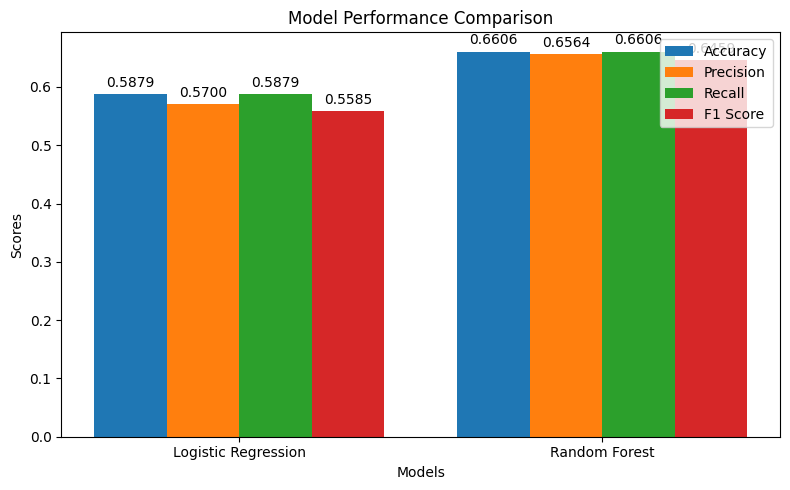

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest']
accuracy = [0.5879, 0.6606]
precision = [0.5700, 0.6564]
recall = [0.5879, 0.6606]
f1_score = [0.5585, 0.6459]

# Plotting the metrics
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Reduced size of the plot (smaller figure)
fig, ax = plt.subplots(figsize=(8, 5))

# Create bars for each metric
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding value labels on top of the bars
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)
add_value_labels(rects3)
add_value_labels(rects4)

fig.tight_layout()

# Show the plot
plt.show()


# **CONCLUSION**
*  **Best performing model: Random Forest** show the best performance, with identical results in terms of accuracy, precision, recall, and F1 score.

* **Logistic Regression is the least performing model** in terms of the evaluation metrics.